# Telecom: Finding Clients With Non-Optimal Plans

#### Practicum100

#### Final Project

###### by __Vadim Fridman__

#### Table of contents

0. [Step 0: Decomposition](#ecomposition)


1. [Step 1.  Data import & memory optimizing](#step1)


2. [Step 2. EDA ](#step2)


3. [Step 3. Optimal tariff plan calculation](#step3)


4. [Step 4. Some visualisation](#step4)


5. [Step 5. Test of statistical hypotesis](#step5)


6. [Step 6. Overall conclusion](#step6)


7. [Step 7. Dashboar& Presentation Links & Documentation](#step7) 

#### Step 0. Decomposition
<a class="anchor" id="ecomposition"></a>

_*__Task__*_

_*Find clients who:*_ 

_*a) Overpay for their current plans*_

_*b) Need bigger plans, since they'll be more advantageous*_

It's not exactly clear, why we as junior analysts are working on this task, since we don't know any telecom service provider in the world, which will voluntarily advice their customers to change their tariff plan to the more profitable _*for the customer*_ one. 

Such a research can be performed for internal use within the telecom service provider only to understand which tariff plans are most profitable _*for the company*_ and to use this information in ads and other marketing activities.

Furthermore it's not really clear, that the difference between customers, who _*overpay for their current plans*_ and customers, who _*need bigger plans, since they'll be more advantageous*_. They seems to be exactly the same customers since we are assuming that there is only one optimal tariff plan for each customer.  


Howether the task to find an optimal tariff plan for each customer seems to be pretty straitforward. We have all the necessary data in the datasets. 

(We are not going to dwell in detail on the mandatory stages like data preprocessing and EDA part. As a matter of course we will check the datatypes in our datasets, missing data, duplicates, any other errors and so on.)

To find clients, who overpay for their current plans / who need a better tariff plan, we are going to: 

- filter non active clients (number of calls per month equal zero; check by the way how many customers are non active) 

- find the number of calls and the duration of calls for each client per day and per month and year

- plot the graph with number and the duration of calls for each tariff plan per month; pay attention for possible outliers 

- define a function, which gets the number of calls and the duration of calls (internal/external) per _*n*_ last months for each customer and returns the summary cost of the phone calls for the corresponding period (according to the current tariff plan) per customer per month (and the average for the whole year) 

- define a function (or extend the previous one), which gets the identical input and returns the possible costs for the same amount of (internal/external) calls (for all other tariff plans) and the difference between the current and the optimal tariff plan (the plan with the smallest amount to pay) per customer per month (and the average for the whole year)

- plot a pie chart(s) with percentage of customers with optimal/non optimal plans (for each of current tariff plan) 

- draw an overall conclusion/ formulate recommendations 

We also going to check statistical hypoteses, that the average revenue from users of each tariff plan (pairwise) differs.

__The later notice 1:__


After the deeper consideration of the dataset we had to change some of the steps in our plan. 

The main problem was, what we were given the raw call log data, not the aggregated data for each client, like in the telecom project we worked on a few weeks ago.

So we have to aggregate data by ourselves. This means sinificantly more efforts during the data preparation step. 

__The later notice 2:__

Since we realized, that this Notebook is not the crucial part of the final project, we tried to keet our textual comment very short, but precise. 

We also saved us some time and didn't plot a lot of graphs in the Notebook because we are making a Tableau dashboard with same data. 

#### Step 1. Data import & memory optimizing

<a class="anchor" id="step1"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
#import seaborn as sns
#import plotly.express as px
#import plotly.graph_objects as go
from datetime import datetime

#import scipy as sc
import warnings
warnings.filterwarnings('ignore')

In [2]:
try:
    data = pd.read_csv('telecom_dataset_us.csv')
except:
    data = pd.read_csv('/datasets/telecom_dataset_us.csv')

In [126]:
data.sample(10)

,user_id,date,call_out,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-03 21:00:00,False,False,0,True,2,0,4
1,166377,2019-08-04 21:00:00,True,True,880022,True,3,0,5
2,166377,2019-08-04 21:00:00,True,True,880020,True,1,0,1
3,166377,2019-08-04 21:00:00,True,True,880020,False,1,10,18
4,166377,2019-08-04 21:00:00,True,False,880022,True,3,0,25
5,166377,2019-08-04 21:00:00,True,False,880020,False,2,3,29
6,166377,2019-08-04 21:00:00,True,False,880020,True,8,0,50
7,166377,2019-08-04 21:00:00,False,False,0,True,6,0,35
8,166377,2019-08-04 21:00:00,True,False,880020,True,8,0,50
9,166377,2019-08-05 21:00:00,False,False,0,True,4,0,62


In [4]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 11.1 MB


In [127]:
display(data)

,user_id,date,call_out,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-03 21:00:00,False,False,0,True,2,0,4
1,166377,2019-08-04 21:00:00,True,True,880022,True,3,0,5
2,166377,2019-08-04 21:00:00,True,True,880020,True,1,0,1
3,166377,2019-08-04 21:00:00,True,True,880020,False,1,10,18
4,166377,2019-08-04 21:00:00,True,False,880022,True,3,0,25
...,...,...,...,...,...,...,...,...,...
53897,168606,2019-11-09 21:00:00,True,True,957922,True,1,0,38
53898,168606,2019-11-10 21:00:00,True,True,957922,False,2,479,501
53899,168606,2019-11-14 21:00:00,True,True,957922,False,4,3130,3190
53900,168606,2019-11-14 21:00:00,True,True,957922,False,4,3130,3190


As we can see, we definitly have some issues with _*operator_id*_ column (ca. 8000 null values). It can be incoming (or incoming internal) calls. Or some technical error during data collection or export. 

Some of datatypes in the dataset can be optimized. E.g. the column _*internal*_ contains booleans only, which are saved saved as objects! It's pure waste of memory! 

In [5]:
data.internal.nunique()

2

In [6]:
data.user_id.nunique()

307

In [7]:
data.direction.nunique()

2

E.g. the column _*direction*_ has only two values and can be stored as Boolean which occupied only 2 bits of memory each(intead of 64 used now). 

In [8]:
counter = 0
for x in (data.operator_id):
    if x.is_integer(): 
        counter +=1
print(counter)

45730


The output shows, that all values in the column _*operator_id*_ are actually integers, but they all are saved as floats. We can convert them to integers to save used memory. 

In [9]:
data.describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration
count,53902.000000,45730.000000,53902.000000,53902.000000,53902.000000
mean,167295.344477,916535.993002,16.451245,866.684427,1157.133297
std,598.883775,21254.123136,62.917170,3731.791202,4403.468763
min,166377.000000,879896.000000,1.000000,0.000000,0.000000
25%,166782.000000,900788.000000,1.000000,0.000000,47.000000
50%,167162.000000,913938.000000,4.000000,38.000000,210.000000
75%,167819.000000,937708.000000,12.000000,572.000000,902.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000


All of the values in the columns _*user_id, operator_id, calls_count, total_call_duration, call_duration*_ are really small integers, but each of the values are saved as float64. It's also pure waste of memory. We can use int32 or in case of _*calls_count*_ even int16. 

So now we can change the datatypes to the optimal one for each column.

In [10]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              53902 non-null  int64  
 1   date                 53902 non-null  object 
 2   direction            53902 non-null  object 
 3   internal             53785 non-null  object 
 4   operator_id          45730 non-null  float64
 5   is_missed_call       53902 non-null  bool   
 6   calls_count          53902 non-null  int64  
 7   call_duration        53902 non-null  int64  
 8   total_call_duration  53902 non-null  int64  
dtypes: bool(1), float64(1), int64(4), object(3)
memory usage: 11.1 MB


In [11]:
data.date=data.date.astype('datetime64[s]')

In [12]:
data.user_id=data.user_id.astype('int32')

In [13]:
data.operator_id=data.operator_id.fillna(0)

In [14]:
data.operator_id=data.operator_id.astype('int32')

In [15]:
data.total_call_duration=data.total_call_duration.astype('int32')

In [16]:
data.call_duration=data.call_duration.astype('int32')

In [17]:
data.calls_count=data.calls_count.astype('int16')

In [18]:
data.internal=data.internal.astype('Bool')

In [19]:
data = data.rename(columns={"direction": "call_out"})

In [20]:
data.head()

,user_id,date,call_out,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-03 21:00:00,in,False,0,True,2,0,4
1,166377,2019-08-04 21:00:00,out,True,880022,True,3,0,5
2,166377,2019-08-04 21:00:00,out,True,880020,True,1,0,1
3,166377,2019-08-04 21:00:00,out,True,880020,False,1,10,18
4,166377,2019-08-04 21:00:00,out,False,880022,True,3,0,25


In [21]:
data.call_out = data.call_out.replace( {'out': True, 'in': False})

In [22]:
data.head()

,user_id,date,call_out,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
0,166377,2019-08-03 21:00:00,False,False,0,True,2,0,4
1,166377,2019-08-04 21:00:00,True,True,880022,True,3,0,5
2,166377,2019-08-04 21:00:00,True,True,880020,True,1,0,1
3,166377,2019-08-04 21:00:00,True,True,880020,False,1,10,18
4,166377,2019-08-04 21:00:00,True,False,880022,True,3,0,25


In [23]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53902 entries, 0 to 53901
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53902 non-null  int32         
 1   date                 53902 non-null  datetime64[ns]
 2   call_out             53902 non-null  bool          
 3   internal             53902 non-null  bool          
 4   operator_id          53902 non-null  int32         
 5   is_missed_call       53902 non-null  bool          
 6   calls_count          53902 non-null  int16         
 7   call_duration        53902 non-null  int32         
 8   total_call_duration  53902 non-null  int32         
dtypes: bool(3), datetime64[ns](1), int16(1), int32(4)
memory usage: 1.5 MB


11.1 Mb -> 5.3 Mb is more then 50% saved memory without loosing any information in the dataset. We would say, the memory usage is optimized. And we can have a look to the second dataset.

In [24]:
try:
    clients = pd.read_csv('telecom_clients_us.csv')
except:
    clients = pd.read_csv('/datasets/telecom_clients_us.csv')

In [25]:
clients.sample(10)

,user_id,tariff_plan,date_start
1,166901,A,2019-08-23
583,167716,B,2019-09-26
652,166734,B,2019-08-16
465,167663,C,2019-09-24
50,166582,A,2019-08-09
585,167565,B,2019-09-20
667,166783,B,2019-08-19
192,168155,C,2019-10-15
53,166439,A,2019-08-02
333,166917,C,2019-08-23


In [26]:
clients.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   user_id      732 non-null    int64 
 1   tariff_plan  732 non-null    object
 2   date_start   732 non-null    object
dtypes: int64(1), object(2)
memory usage: 95.2 KB


In [27]:
clients.describe()

,user_id
count,732.000000
mean,167431.927596
std,633.810383
min,166373.000000
25%,166900.750000
50%,167432.000000
75%,167973.000000
max,168606.000000


Here we can also optimize memory usage a bit. 

In [28]:
clients.user_id=clients.user_id.astype('int32')

In [29]:
clients['tariff_plan'] = clients.tariff_plan.astype('category')

In [30]:
clients.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   user_id      732 non-null    int32   
 1   tariff_plan  732 non-null    category
 2   date_start   732 non-null    object  
dtypes: category(1), int32(1), object(1)
memory usage: 51.8 KB


95.2 KB - > 51.8 KB: We saved almost 50% of memory in this case too.

We want to merge both DF in one at this point. In fact we are just adding two new columns to the main dataset. 

In [31]:
data.shape

(53902, 9)

In [32]:
df = data.merge(clients, left_on='user_id', right_on='user_id', how='left')

In [33]:
#df.shape

In [34]:
df.sample(20)

,user_id,date,call_out,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
6105,166541,2019-09-09 21:00:00,False,False,0,True,6,0,105,A,2019-08-07
32626,167471,2019-10-31 21:00:00,False,False,944646,False,3,246,276,C,2019-09-18
34047,167497,2019-11-05 21:00:00,True,True,924932,False,1,89,106,A,2019-09-18
42315,167949,2019-10-29 21:00:00,False,False,0,True,1,0,24,A,2019-10-07
49043,168187,2019-11-19 21:00:00,True,False,937810,False,4,229,281,A,2019-10-16
49120,168187,2019-11-19 21:00:00,False,False,937742,False,3,205,246,A,2019-10-16
3529,166485,2019-11-17 21:00:00,True,False,887276,False,11,1220,1293,B,2019-08-06
51660,168336,2019-11-11 21:00:00,False,False,947304,False,2,167,183,C,2019-10-22
44448,168047,2019-11-13 21:00:00,True,False,937604,True,1,0,41,B,2019-10-10
40721,167827,2019-11-08 21:00:00,True,False,929428,True,338,0,7150,C,2019-10-02


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53902 entries, 0 to 53901
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53902 non-null  int32         
 1   date                 53902 non-null  datetime64[ns]
 2   call_out             53902 non-null  bool          
 3   internal             53902 non-null  bool          
 4   operator_id          53902 non-null  int32         
 5   is_missed_call       53902 non-null  bool          
 6   calls_count          53902 non-null  int16         
 7   call_duration        53902 non-null  int32         
 8   total_call_duration  53902 non-null  int32         
 9   tariff_plan          53902 non-null  category      
 10  date_start           53902 non-null  object        
dtypes: bool(3), category(1), datetime64[ns](1), int16(1), int32(4), object(1)
memory usage: 2.4+ MB


In [36]:
df.tail()

,user_id,date,call_out,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
53897,168606,2019-11-09 21:00:00,True,True,957922,True,1,0,38,C,2019-10-31
53898,168606,2019-11-10 21:00:00,True,True,957922,False,2,479,501,C,2019-10-31
53899,168606,2019-11-14 21:00:00,True,True,957922,False,4,3130,3190,C,2019-10-31
53900,168606,2019-11-14 21:00:00,True,True,957922,False,4,3130,3190,C,2019-10-31
53901,168606,2019-11-18 21:00:00,False,False,0,True,2,0,64,C,2019-10-31


In [37]:
data.tail()

,user_id,date,call_out,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration
53897,168606,2019-11-09 21:00:00,True,True,957922,True,1,0,38
53898,168606,2019-11-10 21:00:00,True,True,957922,False,2,479,501
53899,168606,2019-11-14 21:00:00,True,True,957922,False,4,3130,3190
53900,168606,2019-11-14 21:00:00,True,True,957922,False,4,3130,3190
53901,168606,2019-11-18 21:00:00,False,False,0,True,2,0,64


#### Step 2. EDA
<a class="anchor" id="step2"></a>

In [38]:
df.head(10)

,user_id,date,call_out,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
0,166377,2019-08-03 21:00:00,False,False,0,True,2,0,4,B,2019-08-01
1,166377,2019-08-04 21:00:00,True,True,880022,True,3,0,5,B,2019-08-01
2,166377,2019-08-04 21:00:00,True,True,880020,True,1,0,1,B,2019-08-01
3,166377,2019-08-04 21:00:00,True,True,880020,False,1,10,18,B,2019-08-01
4,166377,2019-08-04 21:00:00,True,False,880022,True,3,0,25,B,2019-08-01
5,166377,2019-08-04 21:00:00,True,False,880020,False,2,3,29,B,2019-08-01
6,166377,2019-08-04 21:00:00,True,False,880020,True,8,0,50,B,2019-08-01
7,166377,2019-08-04 21:00:00,False,False,0,True,6,0,35,B,2019-08-01
8,166377,2019-08-04 21:00:00,True,False,880020,True,8,0,50,B,2019-08-01
9,166377,2019-08-05 21:00:00,False,False,0,True,4,0,62,B,2019-08-01


In [39]:
df.isna().sum()

user_id                0
date                   0
call_out               0
internal               0
operator_id            0
is_missed_call         0
calls_count            0
call_duration          0
total_call_duration    0
tariff_plan            0
date_start             0
dtype: int64

Since we replace NaNs in the _*operator_id*_ column we have no missing values more. That's good. 

In [40]:
df.duplicated().sum()

4900

That does not look good. But are all of them really duplicates?

In [41]:
df[df['user_id'].duplicated()].tail(20)

,user_id,date,call_out,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
53880,168601,2019-11-27 21:00:00,False,False,0,True,1,0,19,C,2019-10-31
53881,168601,2019-11-27 21:00:00,True,False,952914,True,2,0,67,C,2019-10-31
53883,168603,2019-11-19 21:00:00,True,False,959118,True,3,0,89,B,2019-10-31
53884,168603,2019-11-19 21:00:00,True,False,959118,False,3,419,478,B,2019-10-31
53885,168603,2019-11-19 21:00:00,True,False,959118,True,3,0,89,B,2019-10-31
53886,168603,2019-11-20 21:00:00,True,False,959118,True,1,0,10,B,2019-10-31
53887,168603,2019-11-20 21:00:00,True,False,959118,False,5,338,423,B,2019-10-31
53888,168603,2019-11-26 21:00:00,True,False,959118,False,1,76,99,B,2019-10-31
53889,168603,2019-11-27 21:00:00,False,False,0,True,1,0,30,B,2019-10-31
53891,168606,2019-11-07 21:00:00,False,False,957922,True,1,0,7,C,2019-10-31


It seems, that some of customers performed a few calls simultaneously (we can see same time and _*user_id*_, but different _*operator_id*_ and _*call_duration*_ in the output). It's absolutely okay.

In [42]:
df.describe()

,user_id,operator_id,calls_count,call_duration,total_call_duration
count,53902.000000,53902.000000,53902.000000,53902.000000,53902.000000
mean,167295.344477,777581.369151,16.451245,866.684427,1157.133297
std,598.883775,329292.849066,62.917170,3731.791202,4403.468763
min,166377.000000,0.000000,1.000000,0.000000,0.000000
25%,166782.000000,890416.000000,1.000000,0.000000,47.000000
50%,167162.000000,906406.000000,4.000000,38.000000,210.000000
75%,167819.000000,930020.000000,12.000000,572.000000,902.000000
max,168606.000000,973286.000000,4817.000000,144395.000000,166155.000000


The two last columns are important here. 

We are assuming, we are dealing with call duration in seconds. 

Correspondently we have average(mean) call length ca. 14 minutes (seems to be okay) and ca. 19 minutes incl. waiting time. The latter s a bit strage, because 4 minutes waiting time is too big time period for a typical call. But this data can be absolutely allright since we are dealing with corporate calls. We are assuming, that waiting time here includes waiting on hold which can be conciedered as fully normal in most of call centers. 

Standart deviation of the both call length is pretty big. It's actually absolutely logical, that calls have different length, especially because we haven't filtered calls with length 0 yet. 

144395 seconds as max call length is also very strange figure. It's about 2400 minutes hours or 40 hours. It could not be a normal call. But it could be some sort of automatic connection like dial-up modem or something similar. It also could be some sort of error in call billing system or error during data export.  

We have to check this data later after filtering. 

In [43]:
df.date_start.min()

'2019-08-01'

In [44]:
df.date_start.max()

'2019-10-31'

Interesting fact: it seems, we have data of new users only. The "oldest" user we know registered on the 1st of August 2019. 

In [45]:
df.date.min()

Timestamp('2019-08-01 21:00:00')

In [46]:
df.date.max()

Timestamp('2019-11-27 21:00:00')

One more strange thing about the dataset we have: it's date from 2019/08/01 to 2019/11/28. It means, we presumably does not have full data for November. We have full data for August, September and October only. 

Therefore we can't really perform yearly analysis as we planed earlier: we don't have enough data. From other hand daily and weekly data analysis are not really informative in the telecom field. That's why we have to go with monthly analysis for 4 given month. (And we have to keep in mind that the November data are not 100% complete.) 

In real life we would ask the responsible for the data collection collegues to give us more data; in this project we just going to work with dataset we have.  

We also have to keep in mind, that the data can be skewed due the seasonal factor: August is traditionally the least active month for many businesses and a popular vacation time in many countries. 

Now we are going to filter out the non-active users. Let's define non-active users as users with zero call length during the whole given time period. 

In [47]:
print(len(df.groupby('user_id')['call_duration'].agg('sum') == 0))

307


In [48]:
non_activ = df.groupby('user_id')['call_duration'].sum().reset_index()

In [49]:
non_activ.columns = ['user_id', 'call_duration_sum']

In [50]:
to_filter = non_activ[non_activ['call_duration_sum']== 0]  
len(to_filter)

20

20 users were inactive during the whole given time period. Let's have a deeper look. 

In [51]:
to_filter.head()

,user_id,call_duration_sum
21,166554,0
23,166584,0
99,167077,0
108,167114,0
109,167122,0


In [52]:
df2 = df[df.user_id.isin(to_filter.user_id)]

In [53]:
df2.shape

(129, 11)

In [54]:
df2.sample(20)

,user_id,date,call_out,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan,date_start
44180,168024,2019-10-12 21:00:00,False,False,0,True,1,0,2,C,2019-10-09
44187,168024,2019-10-22 21:00:00,False,False,0,True,2,0,4,C,2019-10-09
44196,168024,2019-11-06 21:00:00,False,False,0,True,3,0,6,C,2019-10-09
23027,167077,2019-10-17 21:00:00,False,False,0,True,2,0,4,B,2019-08-30
44179,168024,2019-10-11 21:00:00,False,False,0,True,5,0,11,C,2019-10-09
23012,167077,2019-09-10 21:00:00,False,False,0,True,1,0,2,B,2019-08-30
44193,168024,2019-11-03 21:00:00,False,False,0,True,2,0,4,C,2019-10-09
7362,166584,2019-08-15 21:00:00,False,False,0,True,2,0,4,C,2019-08-09
51366,168291,2019-11-27 21:00:00,True,False,946454,True,5,0,0,B,2019-10-21
31080,167364,2019-09-30 21:00:00,False,False,0,True,7,0,0,C,2019-09-13


It seems, that our filter works. The output shows, that some of users got incoming calls only, some of them also performed a few calls, but the outgoing calls were not answered. 

Let's filter inactive users out. 

In [55]:
df = df[~df.user_id.isin(to_filter.user_id)]

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53773 entries, 0 to 53901
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   user_id              53773 non-null  int32         
 1   date                 53773 non-null  datetime64[ns]
 2   call_out             53773 non-null  bool          
 3   internal             53773 non-null  bool          
 4   operator_id          53773 non-null  int32         
 5   is_missed_call       53773 non-null  bool          
 6   calls_count          53773 non-null  int16         
 7   call_duration        53773 non-null  int32         
 8   total_call_duration  53773 non-null  int32         
 9   tariff_plan          53773 non-null  category      
 10  date_start           53773 non-null  object        
dtypes: bool(3), category(1), datetime64[ns](1), int16(1), int32(4), object(1)
memory usage: 2.4+ MB


We filtered out 129 rows. 

Since we defined inactive users as users whose total call length is equal zero, some of this users performed actions like calling(unanswered) or recieving calls. Although they generated 0 revenue, __all__ their actions were logged and got in our dataset. That's the reason why we had 129 rows related to 20 unique users. 

According our decomposition we wanted to analyze (among other things) monthly and yearly data. The performed EDA showed, that this will not be really helpful for the whole project. 

But we still want to plot a daily and weekly graph to understand our data better. 

Let's do it. 

In [57]:
df['day'] = df['date'].dt.date

In [58]:
df['week'] = df['date'].dt.week

In [59]:
df['month'] = df['date'].dt.month

In [60]:
df.columns

Index(['user_id', 'date', 'call_out', 'internal', 'operator_id',
       'is_missed_call', 'calls_count', 'call_duration', 'total_call_duration',
       'tariff_plan', 'date_start', 'day', 'week', 'month'],
      dtype='object')

In [61]:
df = df.reindex(columns=['user_id', 'date_start', 'date', 'day', 'week', 'month', 'call_out', 'internal', 'operator_id',
       'is_missed_call', 'calls_count', 'call_duration', 'total_call_duration',
       'tariff_plan'])

In [62]:
df.tail()

,user_id,date_start,date,day,week,month,call_out,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan
53897,168606,2019-10-31,2019-11-09 21:00:00,2019-11-09,45,11,True,True,957922,True,1,0,38,C
53898,168606,2019-10-31,2019-11-10 21:00:00,2019-11-10,45,11,True,True,957922,False,2,479,501,C
53899,168606,2019-10-31,2019-11-14 21:00:00,2019-11-14,46,11,True,True,957922,False,4,3130,3190,C
53900,168606,2019-10-31,2019-11-14 21:00:00,2019-11-14,46,11,True,True,957922,False,4,3130,3190,C
53901,168606,2019-10-31,2019-11-18 21:00:00,2019-11-18,47,11,False,False,0,True,2,0,64,C


In [125]:
#df.to_csv('telecom.csv')

We reordered the DF to make the table more human readable and added two new time columns for the further processing. 

Let's look into daily and weekly call numbers. 

In [63]:
calls_by_days = (
    df.drop([  'date_start', 'date',  'week'], axis=1)
    .groupby('day', as_index=False)
    .agg({'call_duration': 'sum', 'total_call_duration': 'sum'})
)

In [64]:
calls_by_days.shape

(119, 3)

In [65]:
calls_by_days.head()

,day,call_duration,total_call_duration
0,2019-08-01,163,493
1,2019-08-02,962,1454
2,2019-08-03,114,153
3,2019-08-04,7548,9650
4,2019-08-05,15516,18093


In [66]:
plt.rcParams["figure.figsize"] = (15,10)

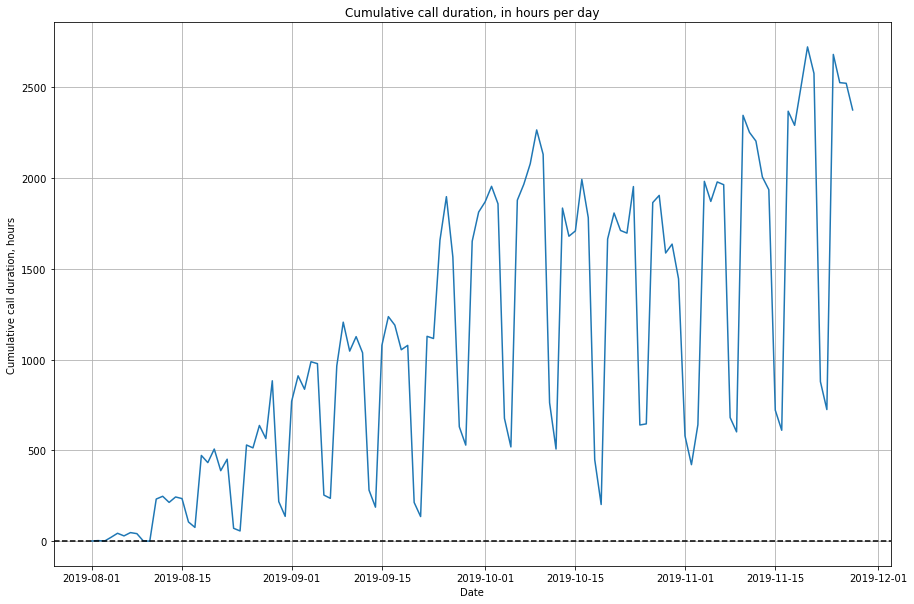

In [67]:
plt.plot(calls_by_days['day'], calls_by_days['call_duration']/360)

plt.title('Cumulative call duration, in hours per day')
plt.xlabel("Date")
plt.ylabel("Cumulative call duration, hours")
plt.grid()

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--');

In [68]:
calls_by_weeks = (
    df.drop([  'date_start', 'date',  'day'], axis=1)
    .groupby('week', as_index=False)
    .agg({'call_duration': 'sum', 'total_call_duration': 'sum'})
)

In [69]:
calls_by_weeks.shape

(18, 3)

In [70]:
calls_by_weeks.head(18)

,week,call_duration,total_call_duration
0,31,8787,11750
1,32,140925,182342
2,33,572153,789510
3,34,875983,1147143
4,35,1339667,1739901
5,36,1859386,2381515
6,37,2145802,2780234
7,38,2171683,2886221
8,39,3255512,4477208
9,40,3802702,5303344


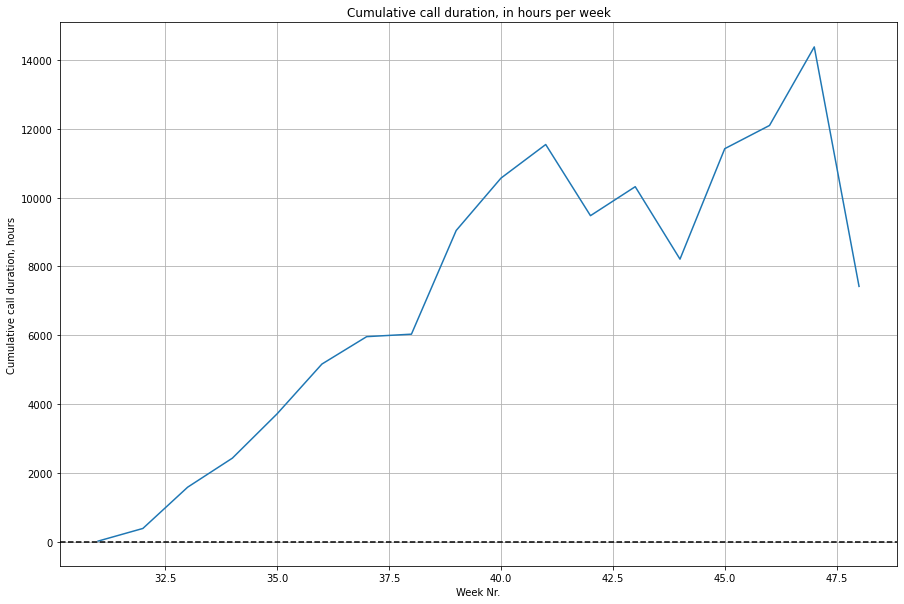

In [71]:
plt.plot(calls_by_weeks['week'], calls_by_weeks['call_duration']/360)

plt.title('Cumulative call duration, in hours per week')
plt.xlabel("Week Nr.")
plt.ylabel("Cumulative call duration, hours")
plt.grid()

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--');

As we assumed earlier, the data in the dataset seems to be skewed because of seasonality: both plots shows, that activity of customers in August was very low, it starts grow in the late Augus and September, and it is stable on the high level since the last week of September till November. 

The daily plot also shows predictable weekly troughs on the weekends. 

#### Step 3. Optimal tariff plan calculation
<a class="anchor" id="step3"></a>

Now we are going to calculate if the active users has the best possible tariff plan. 

At first we are filtering the dataset to save outgoing(= potentially paid) calls only. 

In [72]:
out = df[df['call_out']]

In [73]:
out.call_duration.quantile(0.95)

4850.0

4850 seconds or 80 minutes seems to be okay for a long call. Let's go up. 

In [74]:
out.call_duration.quantile(0.99)

12851.659999999996

12851 seconds or more than 3,5 hours seems also to be okay for a some rare long call. Let's go up a bit.

In [75]:
len(out[out['call_duration']> 21600])

161

In [76]:
len(out[out['call_duration']> 28800])

135

So we have 161/135 calls with duration more than 6/8 hours. This is very suspicious. 

Even a blabbermouth employee who has absolutly nothing to do in the office can not not call a friend for the whole work shift without interruption. 

We are going to filter out all the calls with length more than 6 hours. (We just chose this threshold. It's less than 1% of our data.) 

We are also filtering all the outgoing calls with 0 sec length. 

In [77]:
out = out[out['call_duration']< 12851]

In [78]:
out = out[out['call_duration']> 0]

In [79]:
out.describe()

,user_id,week,month,operator_id,calls_count,call_duration,total_call_duration
count,16676.000000,16676.000000,16676.000000,16676.000000,16676.000000,16676.000000,16676.000000
mean,167298.300372,42.946270,10.196150,913918.316982,15.671144,1472.251679,1714.799952
std,593.847609,3.723694,0.842549,53028.754079,23.822963,2121.714708,2485.773119
min,166377.000000,31.000000,8.000000,0.000000,1.000000,1.000000,1.000000
25%,166800.000000,40.000000,10.000000,900826.000000,2.000000,147.000000,177.000000
50%,167175.000000,44.000000,10.000000,913788.000000,6.000000,589.000000,701.000000
75%,167799.000000,46.000000,11.000000,937156.000000,19.000000,1899.250000,2232.250000
max,168606.000000,48.000000,11.000000,973120.000000,267.000000,12828.000000,58027.000000


In [80]:
out.call_duration.median()

589.0

Interesting that the average(mean) call length after filtering has become longer: 24/28 minutes (without/with waiting time). 

The median value is much smaller: less than 10 minutes. This means, we could filter out even more suspiciously long calls. 

Now we are going to devide the dataframe we got into two separat dataframes: the 1st one with outgoing internal calls only and the 2ns one with othe outgoing calls only. 

After that we are going to aggregate data by unique users. 

In [81]:
int = out[out['internal']]

In [82]:
int.head()

,user_id,date_start,date,day,week,month,call_out,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,tariff_plan
3,166377,2019-08-01,2019-08-04 21:00:00,2019-08-04,31,8,True,True,880020,False,1,10,18,B
386,166377,2019-08-01,2019-10-21 21:00:00,2019-10-21,43,10,True,True,880028,False,1,2,4,B
392,166377,2019-08-01,2019-10-21 21:00:00,2019-10-21,43,10,True,True,880028,False,1,2,4,B
465,166377,2019-08-01,2019-11-06 21:00:00,2019-11-06,45,11,True,True,880028,False,1,120,122,B
1082,166405,2019-08-02,2019-09-30 21:00:00,2019-09-30,40,9,True,True,902532,False,5,213,253,B


In [83]:
int_cost_agg_monthly = int.pivot_table(index = 'user_id', columns='month', values='call_duration', aggfunc='sum').reset_index()

Because tariff plans specs we still need monthly data for all the internal calls. 

In [84]:
int_cost_agg_monthly.columns = ['user_id', 'Aug', 'Sep', 'Oct', 'Nov']

In [85]:
int_cost_agg_monthly = int_cost_agg_monthly.fillna(0)

In [86]:
#int_cost_agg_monthly[['Aug', 'Sep', 'Oct', 'Nov']]

In [87]:
'''def filt(row):
    if (row['Aug'] + row['Sep'] + row['Oct'] + row['Nov']) == 0:
        row['to_del'] = True
    return row   '''

"def filt(row):\n    if (row['Aug'] + row['Sep'] + row['Oct'] + row['Nov']) == 0:\n        row['to_del'] = True\n    return row   "

In [94]:
out_only = out[out['internal'] == False] 

In [95]:
out_cost_agg = out_only.pivot_table(index='user_id', values='call_duration', aggfunc='sum').reset_index()

In [96]:
out_cost_agg.sample(10)

,user_id,call_duration
59,167002,12194
37,166812,27292
31,166717,45425
206,168601,27263
22,166677,19134
149,167852,353
197,168295,12058
53,166971,13230
145,167827,401198
200,168361,3240521


In [97]:
costs_agg = pd.merge(out_cost_agg, int_cost_agg_monthly, on='user_id', how = 'outer')

Now we want to add current tariff plan data to our small dataset. 

In [98]:
plan = out.drop(columns=[ 'date_start', 'date', 'day', 'week', 'month', 'call_out',
       'internal', 'operator_id', 'is_missed_call', 'calls_count',
       'call_duration', 'total_call_duration']).drop_duplicates()

In [99]:
costs_agg = costs_agg.merge(plan, on='user_id', how='left')

In [100]:
costs_agg

,user_id,call_duration,Aug,Sep,Oct,Nov,tariff_plan
0,166377,351112.0,10.0,0.0,4.0,120.0,B
1,166405,845028.0,0.0,213.0,58.0,35.0,B
2,166406,351973.0,729.0,0.0,583.0,0.0,B
3,166407,23892.0,0.0,4726.0,8764.0,5440.0,A
4,166485,367554.0,0.0,8048.0,18358.0,9928.0,B
...,...,...,...,...,...,...,...
206,168601,27263.0,NaN,NaN,NaN,NaN,C
207,168603,905.0,NaN,NaN,NaN,NaN,B
208,168606,806.0,0.0,0.0,0.0,6739.0,C
209,166732,NaN,0.0,336.0,10.0,229.0,B


In [101]:
costs_agg.replace(np.nan, 0)

,user_id,call_duration,Aug,Sep,Oct,Nov,tariff_plan
0,166377,351112.0,10.0,0.0,4.0,120.0,B
1,166405,845028.0,0.0,213.0,58.0,35.0,B
2,166406,351973.0,729.0,0.0,583.0,0.0,B
3,166407,23892.0,0.0,4726.0,8764.0,5440.0,A
4,166485,367554.0,0.0,8048.0,18358.0,9928.0,B
...,...,...,...,...,...,...,...
206,168601,27263.0,0.0,0.0,0.0,0.0,C
207,168603,905.0,0.0,0.0,0.0,0.0,B
208,168606,806.0,0.0,0.0,0.0,6739.0,C
209,166732,0.0,0.0,336.0,10.0,229.0,B


In [102]:
def calc(row):
    '''Calculating of potential price for the each customer\'s comsumer profile with every tariff plan'''
    
    # Tariff details
    
    counter_internal = 0
    
    internal_call_price_A = 0.1
    internal_call_price_B = 0.15
    internal_call_price_C = 0.3
    
    call_price_A = 0.4
    call_price_B = 0.5
    call_price_C = 0.7

    # check if more then 2000 minutes per month
    if row['Aug'] > 2000:
        # if True, calculate the price of internal calls
        counter_internal += (row['Aug'] - 2000)
    if row['Sep'] > 2000:
        # if True, calculate the price of internal calls
        counter_internal += (row['Sep'] - 2000)
    if row['Oct'] > 2000:
        # if True, calculate the price of internal calls
        counter_internal += (row['Oct'] - 2000)
    if row['Nov'] > 2000:
        # if True, calculate the price of internal calls
        counter_internal += (row['Nov'] - 2000)
    
    # calculate the monthly costs for each user and plan with all the plans and save the results in separat columns
    
    row['plan_A'] = 4*5000 + counter_internal*internal_call_price_A + row['call_duration']*call_price_A
    row['plan_B'] = 4*2000 + counter_internal*internal_call_price_B + row['call_duration']*call_price_B
    row['plan_C'] = 4*1000 + counter_internal*internal_call_price_C + row['call_duration']*call_price_C
    
    return row

In [103]:
costs_agg = costs_agg.apply(calc, axis = 1)

In [104]:
costs_agg.columns = ['user_id', 'call_duration', 'Aug', 'Sep', 'Oct', 'Nov', 'current_plan',
       'A', 'B', 'C']

In [105]:
costs_agg.head()

,user_id,call_duration,Aug,Sep,Oct,Nov,current_plan,A,B,C
0,166377,351112.0,10.0,0.0,4.0,120.0,B,160444.8,183556.0,249778.4
1,166405,845028.0,0.0,213.0,58.0,35.0,B,358011.2,430514.0,595519.6
2,166406,351973.0,729.0,0.0,583.0,0.0,B,160789.2,183986.5,250381.1
3,166407,23892.0,0.0,4726.0,8764.0,5440.0,A,30849.8,21885.5,24603.4
4,166485,367554.0,0.0,8048.0,18358.0,9928.0,B,170055.0,196327.1,270388.0


In [106]:
def optimal_plan(row):
    
    ''' Finding the best tarif plan for each customer based on previous calculations and checking if current tarif plan is optimal'''
    
    best_option = 'No data'
    
    if (row['A'] <= row['B']) and (row['A'] <= row['C']):
        best_option = 'A'
    if (row['B'] <= row['A']) and (row['B'] <= row['C']):
        best_option = 'B' 
    if (row['C'] <= row['B']) and (row['C'] <= row['A']):
        best_option = 'C'
    
    row['optimal_plan'] = best_option
    
    if row['current_plan']  == best_option:
        row['is_optimal'] = True
    else:
        row['is_optimal'] = False
    return row

In [107]:
costs_agg = costs_agg.apply(optimal_plan, axis = 1)

In [108]:
costs_agg.sample(20)

,user_id,call_duration,Aug,Sep,Oct,Nov,current_plan,A,B,C,optimal_plan,is_optimal
149,167852,353.0,NaN,NaN,NaN,NaN,C,20141.2,8176.50,4247.1,C,True
194,168253,78495.0,NaN,NaN,NaN,NaN,A,51398.0,47247.50,58946.5,B,False
60,167003,35.0,NaN,NaN,NaN,NaN,C,20014.0,8017.50,4024.5,C,True
183,168128,2047.0,NaN,NaN,NaN,NaN,A,20818.8,9023.50,5432.9,C,False
42,166874,76.0,NaN,NaN,NaN,NaN,C,20030.4,8038.00,4053.2,C,True
57,166993,254.0,NaN,NaN,NaN,NaN,C,20101.6,8127.00,4177.8,C,True
148,167840,10.0,NaN,NaN,NaN,NaN,B,20004.0,8005.00,4007.0,C,False
76,167110,267.0,NaN,NaN,NaN,NaN,B,20106.8,8133.50,4186.9,C,False
117,167530,4802.0,NaN,NaN,NaN,NaN,B,21920.8,10401.00,7361.4,C,False
84,167172,46515.0,0.0,35.0,273.0,0.0,B,38606.0,31257.50,36560.5,B,True


In [120]:
costs_agg.fillna(0)

,user_id,call_duration,Aug,Sep,Oct,Nov,current_plan,A,B,C,optimal_plan,is_optimal
0,166377,351112.0,10.0,0.0,4.0,120.0,B,160444.8,183556.00,249778.4,A,False
1,166405,845028.0,0.0,213.0,58.0,35.0,B,358011.2,430514.00,595519.6,A,False
2,166406,351973.0,729.0,0.0,583.0,0.0,B,160789.2,183986.50,250381.1,A,False
3,166407,23892.0,0.0,4726.0,8764.0,5440.0,A,30849.8,21885.50,24603.4,B,False
4,166485,367554.0,0.0,8048.0,18358.0,9928.0,B,170055.0,196327.10,270388.0,A,False
...,...,...,...,...,...,...,...,...,...,...,...,...
206,168601,27263.0,0.0,0.0,0.0,0.0,C,30905.2,21631.50,23084.1,B,False
207,168603,905.0,0.0,0.0,0.0,0.0,B,20362.0,8452.50,4633.5,C,False
208,168606,806.0,0.0,0.0,0.0,6739.0,C,20796.3,9113.85,5985.9,C,True
209,166732,0.0,0.0,336.0,10.0,229.0,B,0.0,0.00,0.0,No data,False


In [122]:
#costs_agg.to_csv('costs_agg.csv')

In [109]:
costs_agg.shape

(211, 12)

In [110]:
costs_agg.is_optimal.sum()

84

So we know now, that only 84 from 211 customers we defined as active has the optimal tariff plan. 

#### Step 4. Some visualisation
<a class="anchor" id="step4"></a>

Now we are going to plot some graphs we are going to use in our presentation later. 

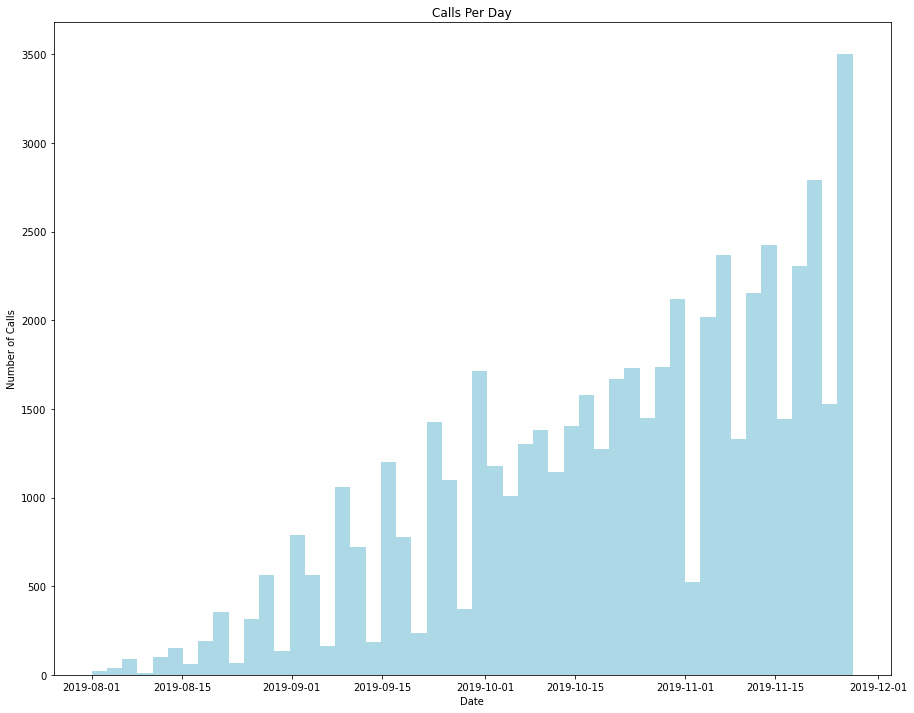

In [111]:
# Number of calls per day

fig = plt.figure(figsize=(15,12))

plt.hist(df['day'], bins=50, color='lightblue')
plt.title('Calls Per Day')
plt.xlabel('Date')
plt.ylabel('Number of Calls')
plt.show()

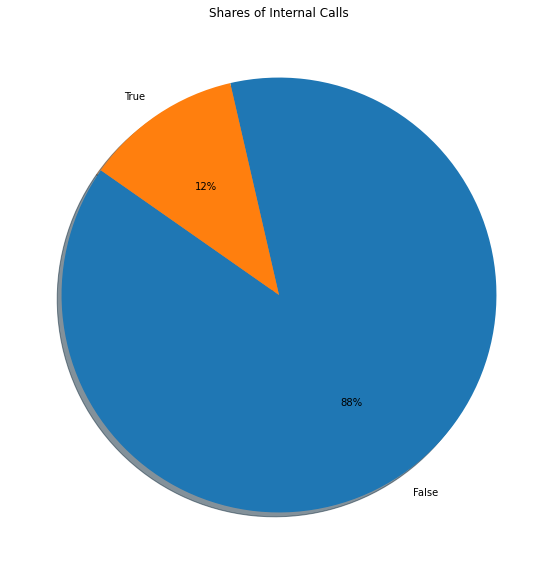

In [112]:
# plot pie chart with proportions of internal and external calls

plt.figure(figsize=(15, 10))

internal_external = df.groupby('internal')['operator_id'].count().reset_index()
internal_external.columns = ['internal', 'count']

labels = ['False', 'True']
plt.pie(internal_external['count'], labels=labels, autopct='%0.f%%', shadow=True, startangle=145)
plt.title('Shares of Internal Calls')
plt.show()

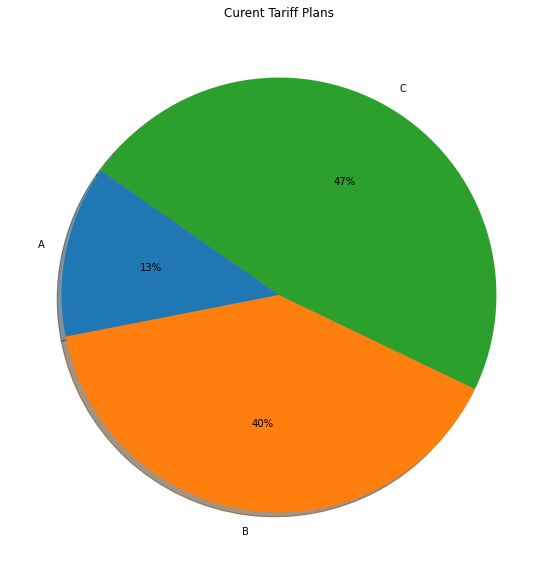

In [113]:
# plot pie chart with proportions of current tariff plans
plt.figure(figsize=(15, 10))

tariff = costs_agg.groupby('current_plan')['user_id'].count().reset_index()
tariff.columns = ['tariff_plan', 'count']

labels = ['A', 'B', 'C']
plt.pie(tariff['count'], labels=labels, autopct='%0.f%%', shadow=True, startangle=145)
plt.title('Curent Tariff Plans')
plt.show()

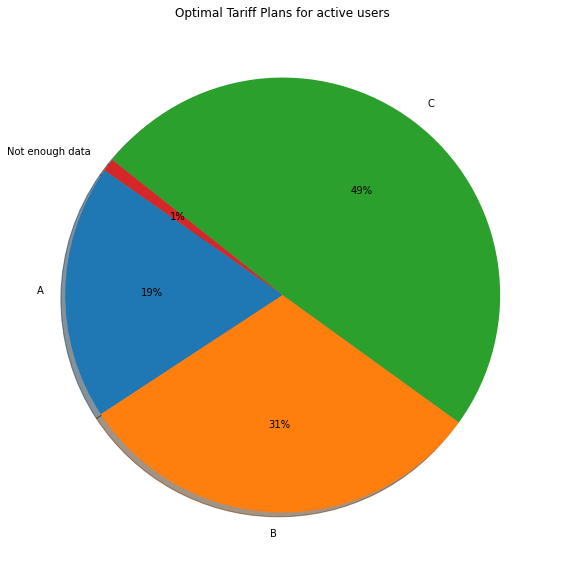

In [129]:
# plot pie chart with proportions of optimal tariff plans
plt.figure(figsize=(15, 10))

tariff2 = costs_agg.groupby('optimal_plan')['user_id'].count().reset_index()
tariff2.columns = ['tariff_plan', 'count']

labels = ['A', 'B', 'C', 'Not enough data']
plt.pie(tariff2['count'], labels=labels, autopct='%0.f%%', shadow=True, startangle=145)
plt.title('Optimal Tariff Plans for active users')
plt.show()

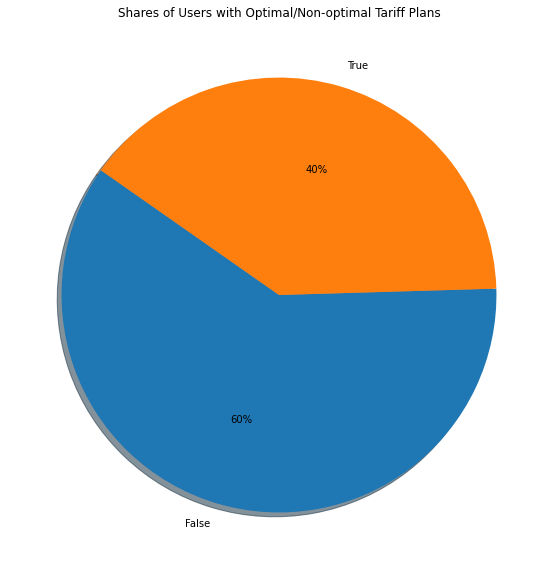

In [115]:
# plot pie chart with proportions of customers with optimal tariff plan

plt.figure(figsize=(15, 10))

optimal = costs_agg.groupby('is_optimal')['user_id'].count().reset_index()
optimal.columns = ['optimal', 'count']

labels = ['False', 'True']
plt.pie(optimal['count'], labels=labels, autopct='%0.f%%', shadow=True, startangle=145)
plt.title('Shares of Users with Optimal/Non-optimal Tariff Plans')
plt.show()

#### Step 5. Test of statistical hypotesis

<a class="anchor" id="step5"></a>

We want to test the hypothesis that the average call duration for customers who use optimal and non-optimal tariff plans are same. 

We can do this using an independent samples t-test to compare the means from the both groups. 

We can apply a t-test here due to the Central Limit Theorem, which impliees that we can estimate the mean of a statistical population using the mean of a sample, and since the means are approximately normally distributed - we can use the t-test.

Null Hypothesis H0: _*The average call duration for customers who use optimal and non-optimal tariff plans are same.*_ 

Alternative Hypothesis H1: _*The average call duration for ineffective operators and effective operators are NOT the same.*_

We use most common non-scientific alpha level 0.05

In [116]:
# Test hypothesis: Average call duration are the same

# get user id of customers with non-optimal tariff plans

non_optimal = costs_agg[costs_agg['is_optimal']==False]

non_optimal_id = non_optimal['user_id'].to_numpy()

# get data relating to customers with non-optimal tariff plans

non_optimal_data = df[df['user_id'].isin(non_optimal_id)]

# calculate average call duration for customers with non-optimal tariff plans

non_optimal_data_avg = non_optimal_data['call_duration'].mean()

In [117]:
# get user id of customers with optimal tariff plans

optimal = costs_agg[costs_agg['is_optimal']]

optimal_id = optimal['user_id'].to_numpy()

# get data relating to customers with optimal tariff plans

optimal_data = df[df['user_id'].isin(optimal_id)]

# calculate average call duration for customers with optimal tariff plans

optimal_data_avg = optimal_data['call_duration'].mean()

In [118]:
# perform a t-test
results = st.ttest_ind(optimal_data['call_duration'], non_optimal_data['call_duration'], equal_var=False)
p_value = results.pvalue
alpha = 0.05

if p_value < alpha:
    print('Reject H0')
else:
    print('Cannot reject H0')

Reject H0


The p_value suggests that we should reject the null hypothesis, thus indicating that the average call duration of with non-optimal and optimal tariff plans do differ enough to be statistically significant. 

This means that the sample results have a rare outcome and therefore it is very unlikely that to be just a lucky significance. 

#### Step 6.  General Conclusion

<a class="anchor" id="step6"></a>

Our task was to find customers who overpay for their current plans or customers who need bigger plans, since they'll be more advantageous. 


Thanks to the data, it was determined that:

- about 88% of calls found within the dataset are external call

- the average (mean) call length is about 14 minutes (about 19 minutes incl. waiting time; before filtering) 

- we were given the data of 732 customers, but only around 300 of them made any phone calls

- all of calls are made by newly registered customers. We also know, that is some kind of corporate calls data. That's why we are assuming, that we had to deal in our dataset with some kind of confirmation new customers had to do per phone 


We are still can't understand why we as junior analysts are working on this particular task, since we don't know any telecom service provider in the world, which will voluntarily advice their customers to change their tariff plan to the more suitable for the customer one.  

So we assume that the research could be performed for internal use within the telecom service provider only to understand which tariff plans are most profitable _*for the company*_ and maybe to use this information in ads and other marketing activities.

(Or the most plausible reason we can find is to train a junior data analyst to work on logged non-aggregated customers data.) 


We found out, that more than the half of the customers (60%) could spent less for their calls during the given period.

We also determined which tariff plan would be optimal for each of the active customers. The exact information about the price difference between optimal/non-optimal plans can be found easily if needed. 

If customers had access to this kind of data, many of them probably would probably change their tariff plan. 

__Important note:__ all the conclusions we made based on data was given us as is since we are working on educational project.

To make conclusions about tariff plans in real life we would ask for more data(at least one round year to find the determine the seasonality and it's influence on customers behaviour.)

#### Step 7.  Links & Documentation

<a class="anchor" id="step7"></a>

Dashboard link: 

https://public.tableau.com/app/profile/vadim.fridman4564/viz/TelecomTrendsinAugust-November2019byV_Fridman/TelecomTrends2019 

Presentation Link: 

https://drive.google.com/file/d/1Z1v3xKkICAoiq6qfdkSVr2dtzevRSBjL/view?usp=sharing 

####  Documentation

Since we are pretty familiar with a telecom field, we didn't need to use any additional information sources to complete the project. 

We used a few sources to get the code ready, i.a. the following topic on Stackoverflow:

https://stackoverflow.com/questions/16236684/apply-pandas-function-to-column-to-create-multiple-new-columns

Below you also find links to the libraries' documentation we used in this project:

- Numpy: https://numpy.org/doc/ 
- Pandas: https://pandas.pydata.org/docs/ 
- Matplotlib.pyplot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html 
- Scipy: https://www.scipy.org/docs.html
- Datetime: https://docs.python.org/3/library/datetime.html